### Step 1: Importing the Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading the Dataset

In [2]:
df=pd.read_csv("Zomato Database.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Step 3: Convert the Data Type of Column rate

In [3]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Step 4: Exploring the Dataset

In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


### Step 4: Checking Null Values

In [7]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Step 5: Checking Duplicates

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
143    False
144    False
145    False
146    False
147    False
Length: 148, dtype: bool

## Ques 1: What type of resturant do the majority of customers order from?

Text(0.5, 0, 'Type of Resturant')

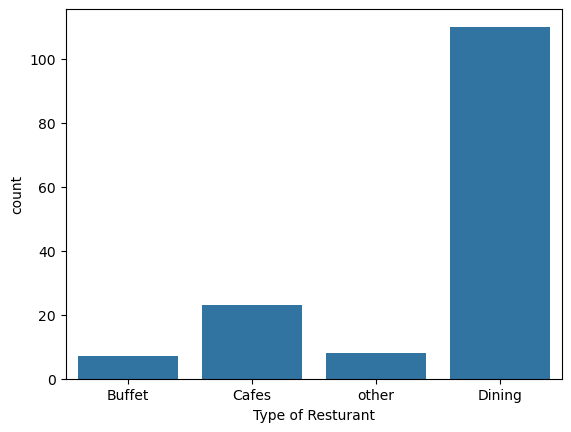

In [9]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Resturant')

### Conclusion- Majority of Resturants falls in Dining Category

## Ques 2: How many votes has each type of resturant received from customers?

Text(0, 0.5, 'Votes')

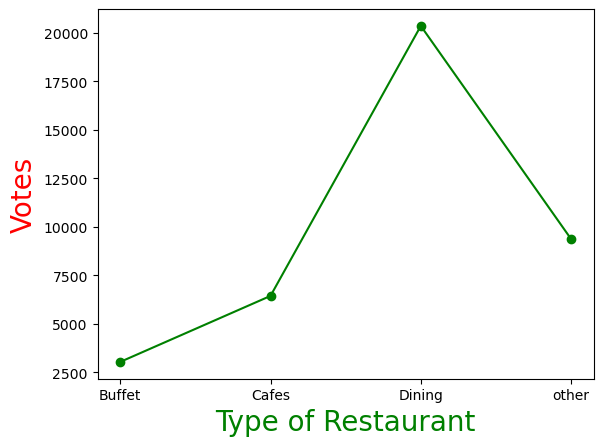

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result = result.reset_index()
plt.plot(result['listed_in(type)'], result['votes'], c='green', marker='o')
plt.xlabel('Type of Restaurant', c='green', size=20)
plt.ylabel('Votes', c='red', size=20)

### Conclusion- Dining Resturants has Received maximum votes

## Ques 3: What are the ratings that the majority of resturant have received?

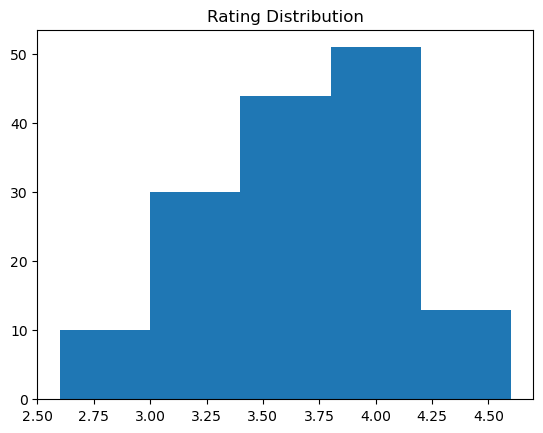

In [11]:
plt.hist(df['rate'], bins=5)
plt.title('Rating Distribution')
plt.show()

### Conclusion- Majority of Resturants received rating from 3.5 to 4

## Ques 4: Zomato has observed that most couples order most of their food online, What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

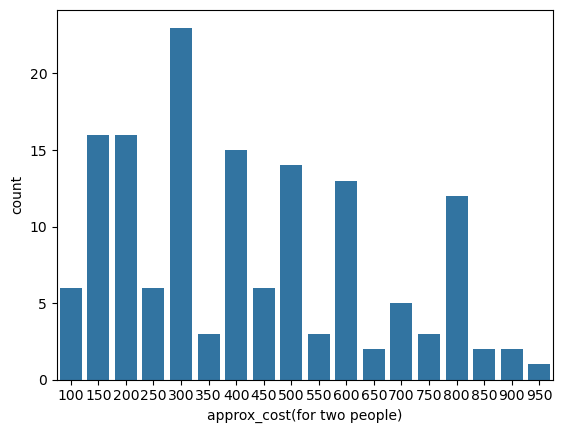

In [12]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion- The majority of Couple prefer resturant with an approximate cost of 300 rupees

## Ques 5: Which mode (Online or Offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

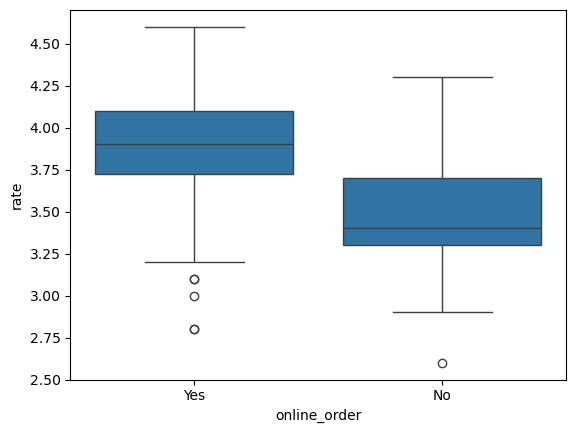

In [13]:
sns.boxplot(x= 'online_order', y= 'rate', data=df)

 ### Conclusion- Offline order receives lower rating in comparison to online order

## Ques 6: Which type of resturant received more offline order, so that Zomato can provide those customers with good offers?

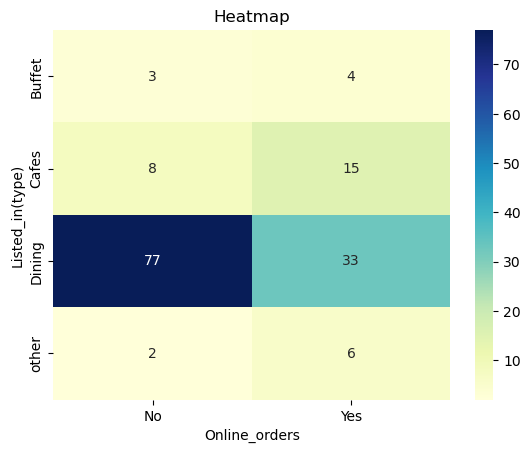

In [14]:
pivot_table=df.pivot_table(index='listed_in(type)', columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot= True, cmap= "YlGnBu", fmt='d')
plt.title('Heatmap')
plt.xlabel('Online_orders')
plt.ylabel('Listed_in(type)')
plt.show()

### Conclusion- Dining resturants primarily accept offline orders, Whereas cafes primarily receive online orders. This suggests that client prefers orders in person at resturant, but prefer online ordering at cafes.